# ****The Dataset - Telco Customer Churn****

Customer churn is a critical challenge for subscription-based businesses, as acquiring new customers is significantly more expensive than retaining existing ones.   

The objective of this project is to analyze customer behavior in a subscription-based telecom company and build a predictive model to identify customers who are likely to churn. Not only limiting the scope of this project to prediction, the goal is to understand the key drivers of churn and translate model insights into actionable retention strategies that the company can actually use for its customers. Therefore, I have chosen the ***Telco Customer Churn Dataset.***

# Dataset Description

The dataset contains customer demographics, subscription details, service usage, and billing information, along with a churn indicator showing whether a customer left the service.

This dataset is well-suited for churn analysis as it mirrors real-world subscription business data and enables both predictive modeling and business-driven analysis.

# Project Objectives

The key objectives of this analysis are:
- To explore behavioral and contractual differences between churned and retained customers
- To identify which factors most strongly influence customer churn
- To build a machine learning model that predicts churn risk
- To derive actionable insights that can inform customer retention strategies

# Data Loading and Inspection

In [189]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set(style = 'whitegrid')

In [190]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [191]:
print("shape of df:", df.shape)
print()
df.info()

shape of df: (7043, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

### **Initial Observations**

- The dataset contains both numerical and categorical features.
- The `TotalCharges` column appears to be stored as a string and will require cleaning.
- The target variable `Churn` is categorical and will be encoded later.

# Data Cleaning

Data Cleaning here is important as removing a small number of incomplete records avoids introducing noise without affecting overall patterns. It will also be beneficial and effective to remove non-informative columns that possess no prediction value.

In [192]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')
print(df.isna().sum())
df = df.dropna()
df = df.drop(columns= ["customerID"])
print()
print("new shape of df:", df.shape)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

new shape of df: (7032, 20)


### **Cleaning Summary:**
- Converted `TotalCharges` to numeric and removed incomplete records
- Dropped customer identifier column
- Retained all behavioral, contractual, and billing features for analysis

# Target Variable - Churn

In [193]:
df["Churn"] = df["Churn"].str.strip().str.upper().map({"YES": 1, "NO": 0})
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [194]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

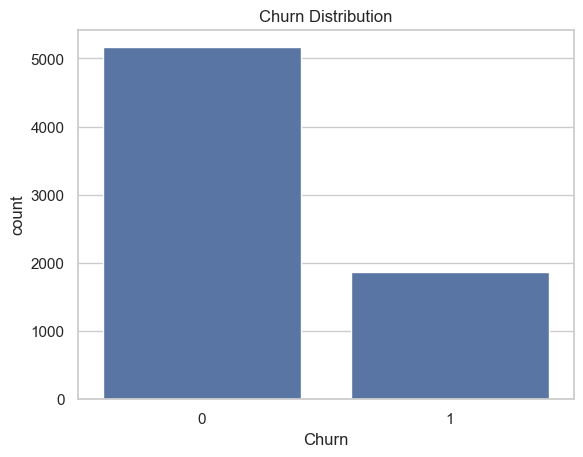

In [195]:
sbn.countplot(x = 'Churn', data = df)
plt.title('Churn Distribution')
plt.show()

**Insight:**  
Roughly 27% of customers churned, indicating a significant retention challenge. The dataset is imbalanced, so evaluation should prioritize identifying churners rather than relying solely on overall accuracy.  

A naive model that predicts every customer stays would achieve about 73% accuracy but fail completely at detecting churners. Therefore, metrics like recall, precision, and F1-score for the churn class are far more meaningful than accuracy in this scenario.

# Core EDA - What Drives Churn?

## Tenure vs Churn

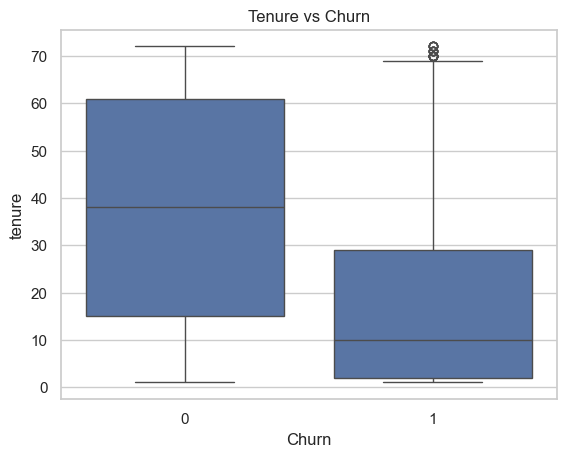

In [196]:
sbn.boxplot(x = "Churn", y = "tenure", data = df)
plt.title("Tenure vs Churn")
plt.show()

**Insight:**  
Customers who churn tend to have significantly shorter tenure, indicating that churn risk is highest early in the customer lifecycle.

## Contract Type vs Churn

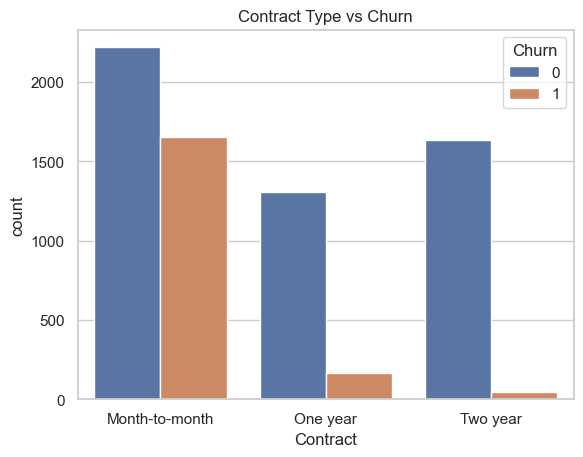

In [197]:
sbn.countplot(x = "Contract", hue = "Churn", data = df)
plt.title("Contract Type vs Churn")
plt.show()

**Insight:**  
Customers on month-to-month contracts churn at a much higher rate than those on longer-term contracts, highlighting commitment level as a key retention factor.

## Monthly Charges vs Churn

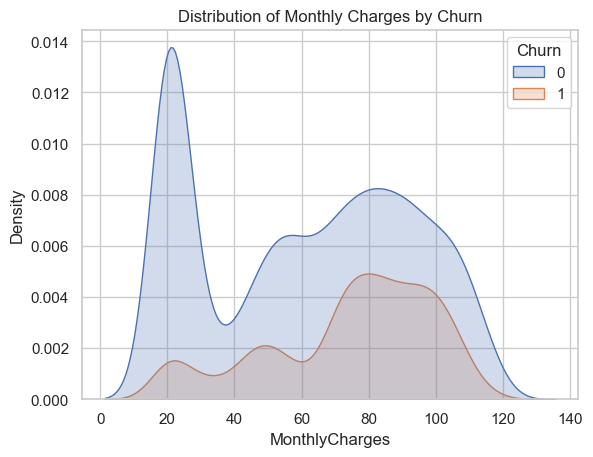

In [198]:
sbn.kdeplot(x = "MonthlyCharges", hue = "Churn", data=df, fill = True)
plt.title("Distribution of Monthly Charges by Churn")
plt.show()

**Insight:**  
Customers with higher monthly charges are more likely to churn, suggesting price sensitivity plays a role, particularly among less-tenured users.

## Service Engagement vs Churn

### 1. Individual Services vs Churn

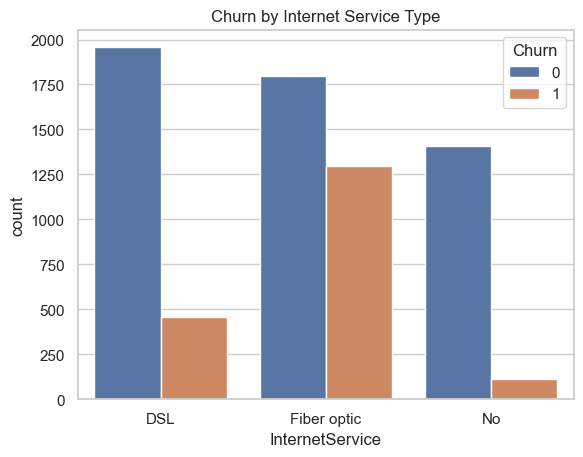

In [199]:
sbn.countplot(x = "InternetService", hue = "Churn", data = df)
plt.title("Churn by Internet Service Type")
plt.show()

### 2. Tech Support vs Churn

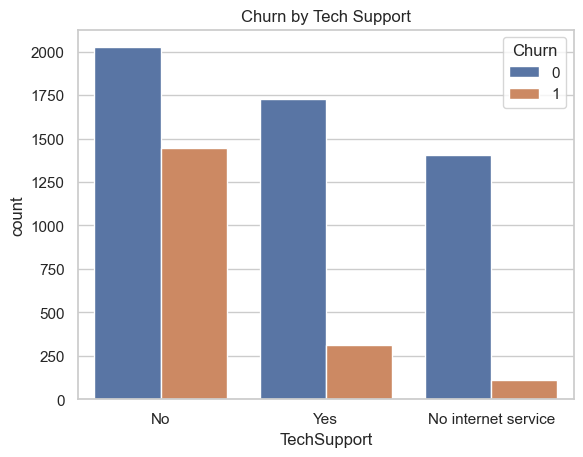

In [200]:
sbn.countplot(x="TechSupport", hue="Churn", data=df)
plt.title("Churn by Tech Support")
plt.show()

### 3. Streaming & Add-on Services

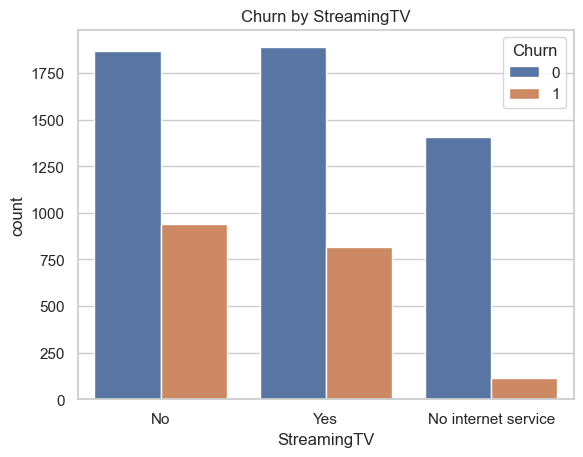

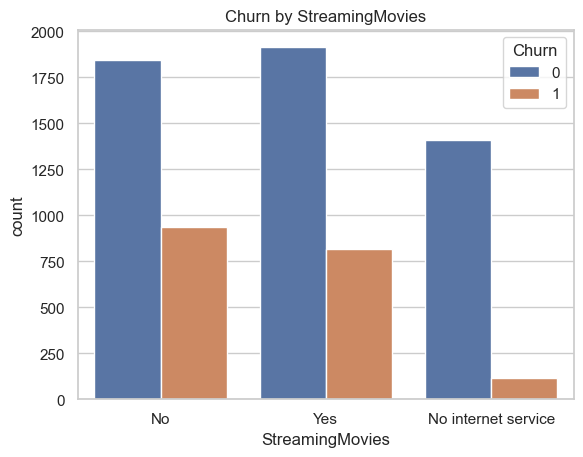

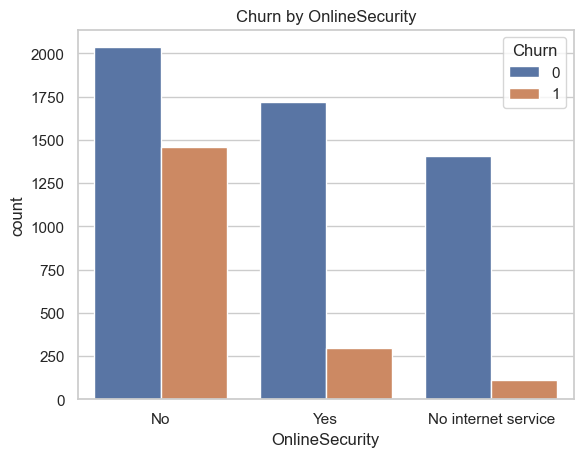

In [201]:
services = ["StreamingTV", "StreamingMovies", "OnlineSecurity"]

for service in services:
    sbn.countplot(x = service, hue = "Churn", data = df)
    plt.title(f"Churn by {service}")
    plt.show()

### **Insight:**  
Customers with fewer subscribed services, particularly those lacking support and security features, are more likely to churn. This suggests that deeper service engagement increases customer stickiness and reduces churn risk.

# Feature Engineering

## Tenure Blocks

In [202]:
from sklearn.preprocessing import OrdinalEncoder

df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-12", "12-24", "24-48", "48+"]
)

tenure_order = [["0-12", "12-24", "24-48", "48+"]]
encoder = OrdinalEncoder(categories = tenure_order)
df["tenure_group_encoded"] = encoder.fit_transform(df[["tenure_group"]])

df = df.drop(columns=["tenure_group"])

## Contract Commitment Level

In [203]:
contract_map = {"Month-to-month": 0, "One year": 1, "Two year": 2}

df["contract commitment"] = df["Contract"].map(contract_map)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group_encoded,contract commitment
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,0,2.0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.0,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2.0,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.0,0


## Engagement Score

In [204]:
service_cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

df["engagement_score"] = (df[service_cols] == "Yes").sum(axis = 1)

## Price Intensity

In [205]:
df["charges_per_tenure"] = df["MonthlyCharges"] / (df["tenure"] + 1)

### **Feature Engineering Summary:**
- Created lifecycle-based tenure groups to capture early vs late churn behavior  
- Encoded contract commitment as an ordered feature reflecting switching friction  
- Aggregated service usage into an engagement score  
- Normalized pricing by tenure to approximate price sensitivity

# Encoding and Train-Test Split

In [206]:
X = df.drop(columns=["Churn"])
X = X.select_dtypes(include="number")
y = df["Churn"]

In [207]:
categorical_cols = X.select_dtypes(include = "object").columns
numeric_cols = X.select_dtypes(include = ["int64", "float64"]).columns

In [208]:
X_encoded = pd.get_dummies(X, columns = categorical_cols, drop_first = True)
X_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,tenure_group_encoded,contract commitment,engagement_score,charges_per_tenure
0,0,1,29.85,29.85,0.0,0,1,14.925000
1,0,34,56.95,1889.50,2.0,1,2,1.627143
2,0,2,53.85,108.15,0.0,0,2,17.950000
3,0,45,42.30,1840.75,2.0,1,3,0.919565
4,0,2,70.70,151.65,0.0,0,0,23.566667
...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1.0,1,5,3.392000
7039,0,72,103.20,7362.90,3.0,1,4,1.413699
7040,0,11,29.60,346.45,0.0,0,1,2.466667
7041,1,4,74.40,306.60,0.0,0,0,14.880000


In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 856, stratify = y)

In [210]:
X_train.shape, X_test.shape

((5625, 8), (1407, 8))

### **Encoding and Split Summary:**

**Preparation Summary:**
- Separated target variable to avoid data leakage  
- One-hot encoded categorical features for model compatibility  
- Applied stratified train-test split to preserve churn distribution

# Baseline Model: Logistic Regression

## Training the Model

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter = 1000, random_state = 856, class_weight = "balanced")
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,856
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Making Predictions

In [212]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

## ROC-AUC

In [213]:
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.3f}")

ROC-AUC: 0.830


## Classification Report

In [214]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.81      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



## Confusion matrix

In [215]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[721 312]
 [ 72 302]]


## HeatMap

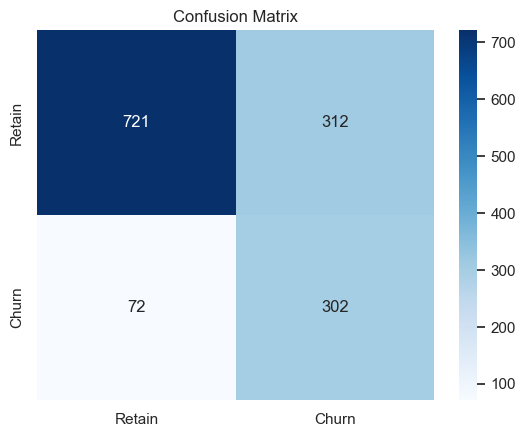

In [216]:
sbn.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["Retain", "Churn"], yticklabels = ["Retain", "Churn"])
plt.title("Confusion Matrix")
plt.show()

In [217]:
coef_df = pd.DataFrame({"Feature": X_train.columns, "Coefficient": model.coef_[0]}).sort_values(by = "Coefficient", ascending = False)

coef_df.head(10)

,Feature,Coefficient
0,SeniorCitizen,0.417941
4,tenure_group_encoded,0.047705
7,charges_per_tenure,0.044539
2,MonthlyCharges,0.022507
3,TotalCharges,0.000242
1,tenure,-0.040012
6,engagement_score,-0.124509
5,contract commitment,-1.046957


# Tree Based Model: Random Forest

## Training the Model

In [218]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 300, random_state = 856, class_weight = "balanced", max_depth = None, n_jobs = -1)

rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Making Predictions

In [219]:
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

## ROC-AUC

In [220]:
rf_roc_auc = roc_auc_score(y_test, rf_prob)
print(f"Random Forest ROC-AUC: {rf_roc_auc:.3f}")

Random Forest ROC-AUC: 0.801


## Classification Report

In [221]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



## Confusion Matrix

In [222]:
rf_cm = confusion_matrix(y_test, rf_pred)
print(rf_cm)

[[918 115]
 [190 184]]


## HeatMap

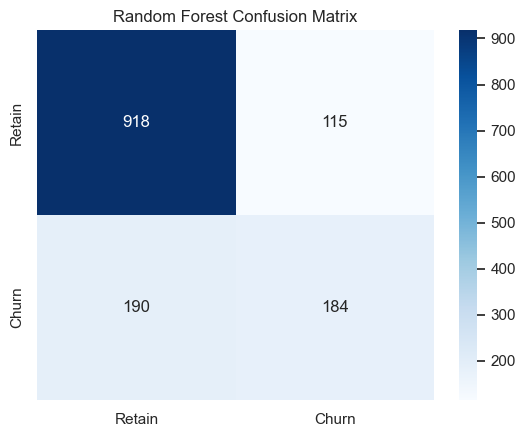

In [223]:
sbn.heatmap(rf_cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["Retain", "Churn"], yticklabels = ["Retain", "Churn"])
plt.title("Random Forest Confusion Matrix")
plt.show()

## Feature Importance

In [224]:
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Importance": rf.feature_importances_}).sort_values(by = "Importance", ascending = False)

feature_importance.head(10)

,Feature,Importance
7,charges_per_tenure,0.260177
2,MonthlyCharges,0.211754
3,TotalCharges,0.190010
1,tenure,0.127208
5,contract commitment,0.113699
6,engagement_score,0.051598
4,tenure_group_encoded,0.028012
0,SeniorCitizen,0.017543


### **Model Comparison:**
- Logistic Regression provides interpretability and clear directional insights.
- Random Forest improves predictive performance by capturing non-linear relationships.
- Random Forest shows stronger recall for churned customers, making it more suitable for proactive retention strategies.

# Threshold Tuning and Decision Layer

## Comparing Recall at Different Threshholds

In [225]:
def evaluate_threshold(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        "threshold": threshold,
        "recall_churn": report["1"]["recall"],
        "precision_churn": report["1"]["precision"]
    }

In [226]:
thresholds = [0.3, 0.4, 0.5]

lr_results = [evaluate_threshold(y_test, y_prob, t) for t in thresholds]

df_lr_results = pd.DataFrame(lr_results)
df_lr_results

,threshold,recall_churn,precision_churn
0,0.3,0.914439,0.402353
1,0.4,0.877005,0.448700
2,0.5,0.807487,0.491857


In [227]:
rf_results = [evaluate_threshold(y_test, rf_prob, t) for t in thresholds]

df_rf_results = pd.DataFrame(rf_results)
df_rf_results

,threshold,recall_churn,precision_churn
0,0.3,0.673797,0.514286
1,0.4,0.582888,0.563307
2,0.5,0.497326,0.611842


## **--> Chosen Threshold - 0.4**

In [228]:
chosen_threshold = 0.4

# Risk Bucket

In [229]:
def risk_bucket(prob):
    if prob >= 0.6:
        return "High Risk"
    elif prob >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

df_test = X_test.copy()
df_test["churn_probability"] = rf_prob
df_test["risk_segment"] = df_test["churn_probability"].apply(risk_bucket)
df_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,tenure_group_encoded,contract commitment,engagement_score,charges_per_tenure,churn_probability,risk_segment
4492,0,54,24.05,1230.90,3.0,2,0,0.437273,0.036667,Low Risk
1371,1,1,79.20,79.20,0.0,0,1,39.600000,0.856667,High Risk
3182,0,45,95.20,4285.80,2.0,2,3,2.069565,0.113333,Low Risk
3541,0,49,40.65,2070.75,3.0,0,2,0.813000,0.090000,Low Risk
5239,0,68,105.75,7322.50,3.0,1,5,1.532609,0.043333,Low Risk
...,...,...,...,...,...,...,...,...,...,...
735,0,32,50.60,1653.45,2.0,0,3,1.533333,0.246667,Low Risk
2808,0,2,97.10,184.15,0.0,0,3,32.366667,0.883333,High Risk
6086,0,61,69.90,4226.70,3.0,2,3,1.127419,0.016667,Low Risk
2026,1,71,105.75,7382.85,3.0,1,4,1.468750,0.040000,Low Risk


### **Retention Strategy by Risk Segment:**
- High Risk: personalized retention offers, priority support
- Medium Risk: engagement nudges, usage reminders
- Low Risk: no immediate action

# Final Model Selection

After evaluating both Logistic Regression and Random Forest models accompanied by threshold strategies, ***LOGISTIC REGRESSION***
was selected as the final churn prediction model.

- Rationale: While Random Forest achieved slightly higher ROC-AUC, Logistic Regression offers interpretability and clear directional insights into feature impact.

- Threshold: 0.4 was chosen to prioritize high recall for churned customers while maintaining reasonable precision.

- Business Alignment: The model’s transparency allows stakeholders to understand why a customer is flagged, facilitating actionable retention decisions.

### **Final configuration**
- Model: Logistic Regression
- Threshold: 0.4
- Optimization focus: High recall for churned customers with controlled precision

This choice prioritizes identifying customers at risk of churn while maintaining
model interpretability and decision transparency.

# Business Interpretation

At a probability threshold of 0.4:  
- The model correctly identifies approximately 88% of churn-prone customers, ensuring early intervention is possible.

- This increases false positives slightly, but in retention scenarios, proactively engaging more customers is less costly than losing them.

- Example: Out of 1,000 at-risk customers, ~880 would be flagged for intervention, allowing the company to focus retention efforts efficiently.


The model emphasizes coverage over raw accuracy, aligning with real-world retention objectives where catching churners early is more valuable than minimizing false alarms.

# Key Drivers of Churn

Analysis of model coefficients reveals several strong predictors of churn:

- Tenure: Shorter-tenured customers are more likely to churn, emphasizing the importance of early engagement and onboarding support.

- Contract Type: Month-to-month plans show higher churn risk, reflecting lower switching costs and weaker customer commitment.

- Monthly Charges: Higher charges correlate with higher churn probability, indicating price sensitivity, particularly among newer customers.

- Service Engagement: Customers lacking value-added services (e.g., Tech Support, Streaming, Security) are more likely to leave, highlighting engagement as a retention lever.

These patterns suggest that early engagement, pricing structure, and contract
stability play a critical role in customer retention.

# Retention Strategy Recommendations

Based on model insights, the following retention strategies are recommended:

1. **Early-Tenure Intervention:** Target customers within the first 6–12 months with onboarding support, tutorials, or proactive outreach.

2. **Contract Stabilization Incentives:** Offer discounts or benefits to encourage high-risk customers to transition from month-to-month contracts to longer-term commitments.

3. **Targeted Retention Spend:** Focus retention offers on customers flagged above the churn threshold rather than applying blanket discounts across the customer base.

4. **Engagement Nudges:** Promote value-added services to low-engagement customers to increase stickiness and reduce churn risk.

This approach optimizes retention impact while minimizing unnecessary costs. Each strategy directly maps to a model-identified driver, ensuring interventions are data-driven and cost-effective.

# Future Work

Potential extensions to strengthen and operationalize the project include:

- **Cost-Sensitive Modeling:** Incorporate retention cost and customer lifetime value to prioritize interventions.
- **Two-Stage Modeling** Combine high-recall models for risk detection with precision-focused models to optimize resource allocation.
- **Dynamic Thresholds:** Adjust probability cutoffs based on customer segments or campaign goals.
- **A/B Testing** est retention strategies informed by model predictions to validate impact in real-world settings.

These extensions would require additional business context and operational data but would provide a pathway for evolving the model from analytical insight to actionable business impact.